Ejercicio 1

Rojo | Área: 10677.00, Perímetro: 503.39, Centroide: (140, 865)
Rojo | Área: 11678.00, Perímetro: 1117.54, Centroide: (147, 635)
Rojo | Área: 11154.50, Perímetro: 1024.53, Centroide: (148, 433)
Rojo | Área: 22553.00, Perímetro: 632.30, Centroide: (142, 202)
Naranja | Área: 15068.50, Perímetro: 594.26, Centroide: (407, 871)
Naranja | Área: 22560.50, Perímetro: 1074.05, Centroide: (411, 637)
Naranja | Área: 12920.50, Perímetro: 585.49, Centroide: (418, 405)
Naranja | Área: 22351.50, Perímetro: 563.77, Centroide: (412, 202)
Amarillo | Área: 10504.00, Perímetro: 539.87, Centroide: (708, 864)
Amarillo | Área: 7440.50, Perímetro: 531.35, Centroide: (713, 648)
Amarillo | Área: 18713.00, Perímetro: 617.59, Centroide: (708, 408)
Amarillo | Área: 22150.50, Perímetro: 558.11, Centroide: (703, 202)
Verde | Área: 9667.00, Perímetro: 740.52, Centroide: (960, 882)
Verde | Área: 0.50, Perímetro: 3.41, Centroide: (969, 561)
Verde | Área: 11341.50, Perímetro: 578.60, Centroide: (974, 658)
Verde | Área: 

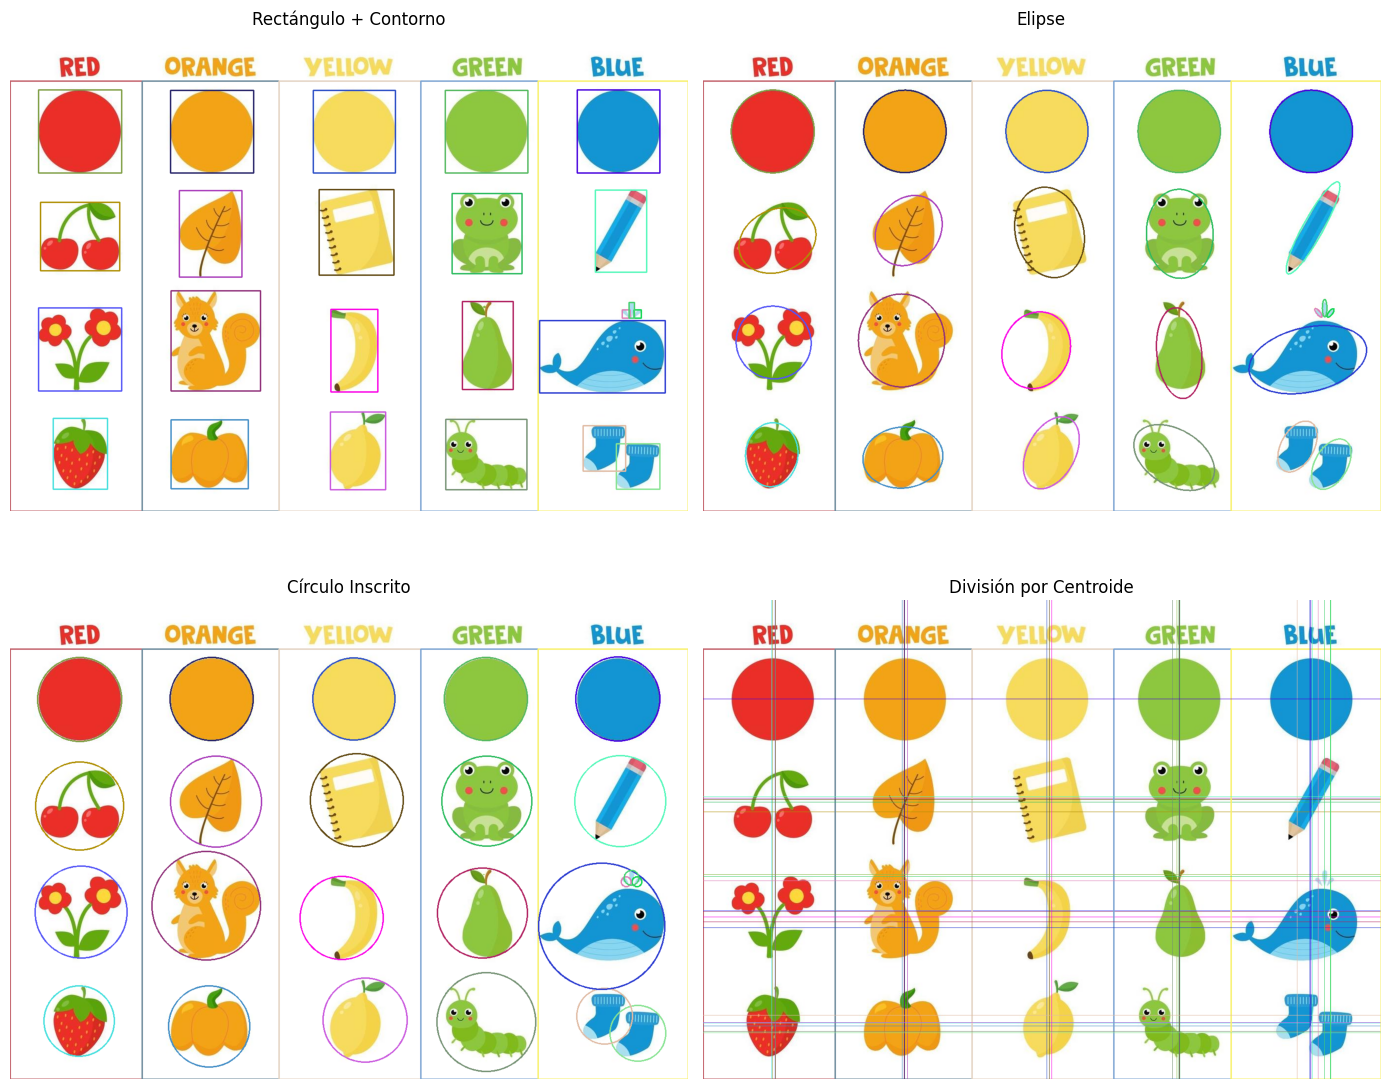

In [152]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("colores.jpg")
h, w, _ = img.shape

h_top_margin = 100
sectores = [
    ("Rojo",     0,   270),
    ("Naranja",  270, 550),
    ("Amarillo", 550, 840),
    ("Verde",    840, 1080),
    ("Azul",     1080, w)
]

figs = [img.copy() for _ in range(4)]

for nombre, x1, x2 in sectores:
    sector_color = tuple(np.random.randint(0, 255, 3).tolist())
    for i in range(4):
        cv2.rectangle(figs[i], (x1, h_top_margin), (x2, h), sector_color, 2)

    sector = img[h_top_margin:h, x1:x2]
    gray = cv2.cvtColor(sector, cv2.COLOR_BGR2GRAY)
    _, binaria = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for c in contornos:
        color = tuple(np.random.randint(0, 255, 3).tolist())
        M = cv2.moments(c)
        if M['m00'] == 0:
            continue
        cx = int(M['m10'] / M['m00']) + x1
        cy = int(M['m01'] / M['m00']) + h_top_margin
        area = cv2.contourArea(c)
        perim = cv2.arcLength(c, True)

        x, y, w_box, h_box = cv2.boundingRect(c)
        cv2.rectangle(figs[0], (x + x1, y + h_top_margin), (x + x1 + w_box, y + h_top_margin + h_box), color, 2)

        if len(c) >= 5:
            ellipse = cv2.fitEllipse(c)
            ellipse = ((ellipse[0][0] + x1, ellipse[0][1] + h_top_margin), ellipse[1], ellipse[2])
            cv2.ellipse(figs[1], ellipse, color, 2)

        (xc, yc), r = cv2.minEnclosingCircle(c)
        cv2.circle(figs[2], (int(xc) + x1, int(yc) + h_top_margin), int(r), color, 2)

        cv2.line(figs[3], (cx, 0), (cx, h), color, 1)
        cv2.line(figs[3], (0, cy), (w, cy), color, 1)

        print(f"{nombre} | Área: {area:.2f}, Perímetro: {perim:.2f}, Centroide: ({cx}, {cy})")

titulos = ['Rectángulo + Contorno', 'Elipse', 'Círculo Inscrito', 'División por Centroide']
plt.figure(figsize=(14, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(figs[i], cv2.COLOR_BGR2RGB))
    plt.title(titulos[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Ejercicio 2

Área: 1331672.50, Perímetro: 18170.87, Centroide: (585, 941)


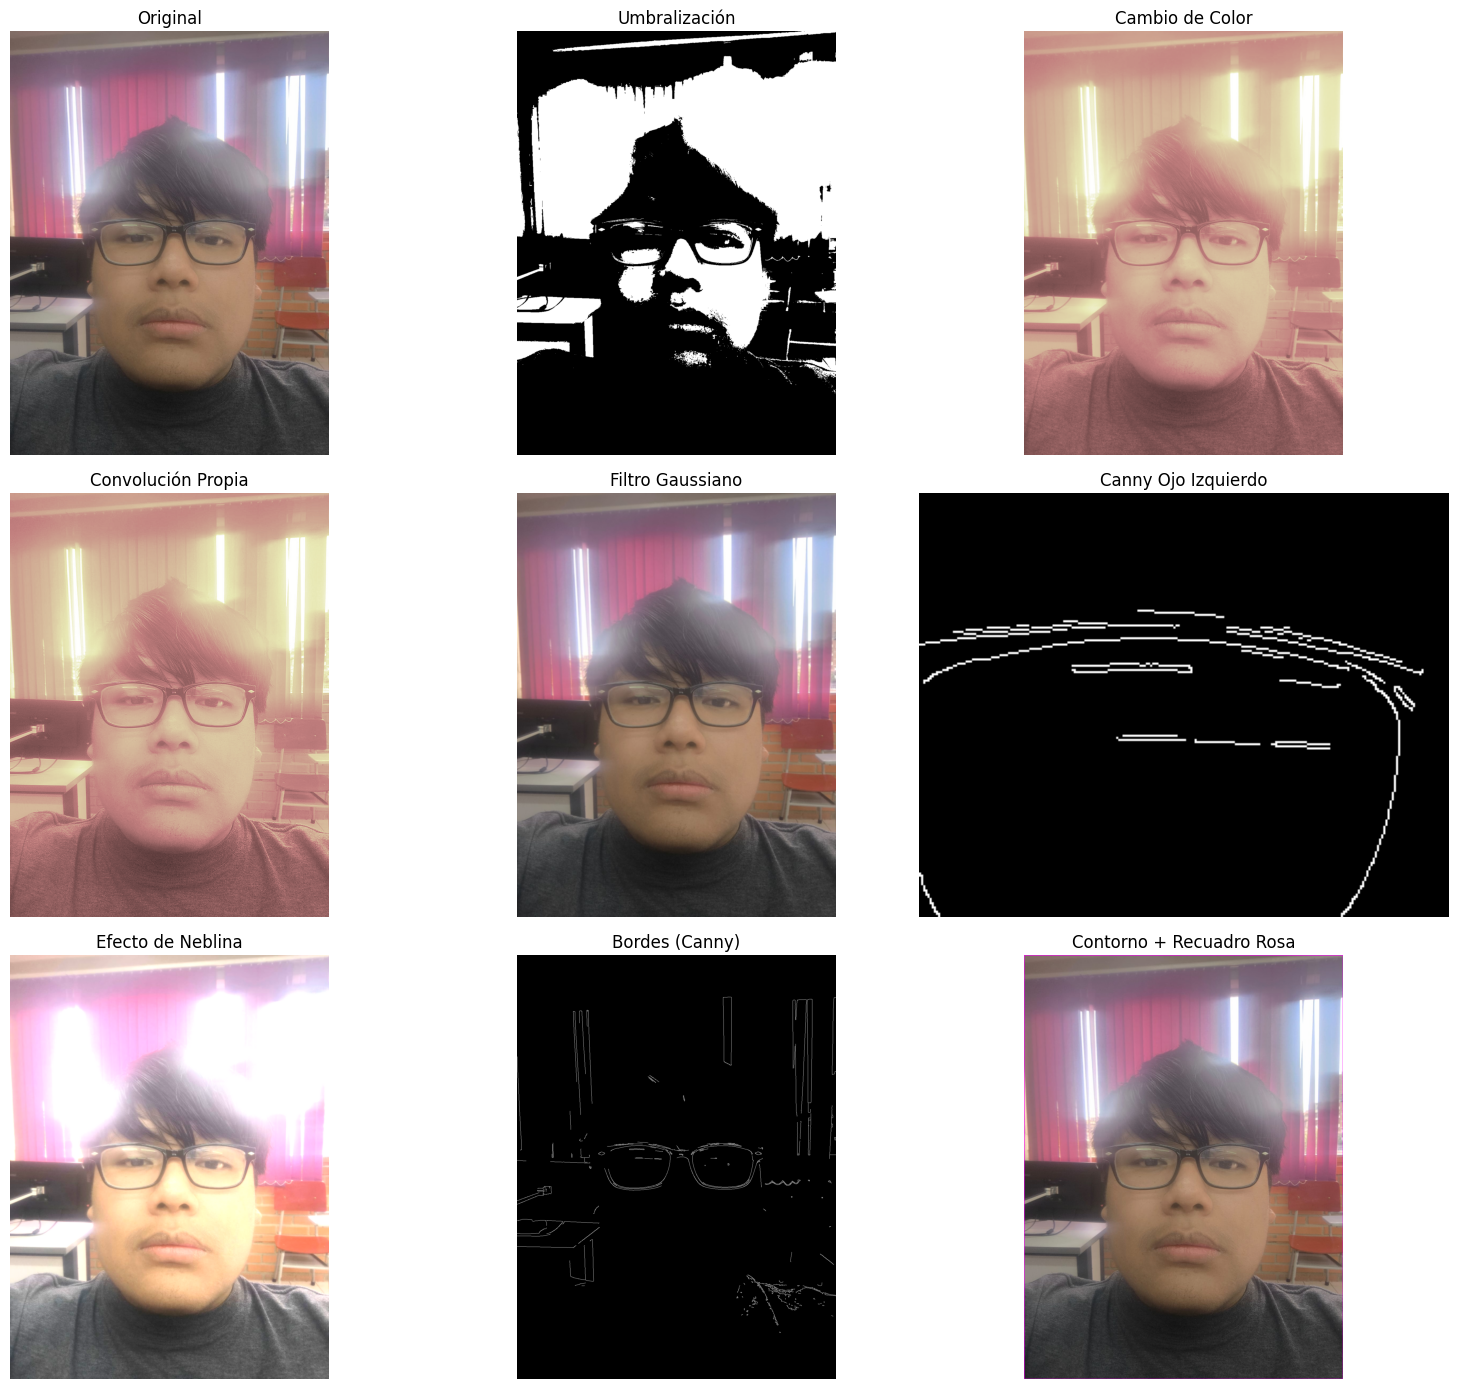

In [168]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('rostro.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bordes = cv2.Canny(gray, 100, 200)

_, umbral = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cambio_color = cv2.applyColorMap(gray, cv2.COLORMAP_PINK)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
convolucion = cv2.filter2D(cambio_color, -1, kernel)

kerne_gauss = cv2.getGaussianKernel(5, 1)
gauss = cv2.filter2D(img, -1, kerne_gauss @ kerne_gauss.T)

ojo_izq = gray[650:850, 350:600]   
canny_ojo = cv2.Canny(ojo_izq, 100, 200)

filtro_neblina = cv2.GaussianBlur(img, (15, 15), 0)
neblina = cv2.addWeighted(img, 0.9, filtro_neblina, 0.9, 0)

_, binaria = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contorno = img.copy()
if contornos:
    c = max(contornos, key=cv2.contourArea)
    M = cv2.moments(c)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        area = cv2.contourArea(c)
        perimetro = cv2.arcLength(c, True)
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(img_contorno, (x, y), (x+w, y+h), (255, 0, 255), 2)
        print(f"Área: {area:.2f}, Perímetro: {perimetro:.2f}, Centroide: ({cx}, {cy})")

plt.figure(figsize=(16, 14))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(umbral, cmap='gray')
plt.title('Umbralización')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(cambio_color, cv2.COLOR_BGR2RGB))
plt.title('Cambio de Color')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(convolucion, cv2.COLOR_BGR2RGB))
plt.title('Convolución Propia')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(gauss, cv2.COLOR_BGR2RGB))
plt.title('Filtro Gaussiano')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(canny_ojo, cmap='gray')
plt.title('Canny Ojo Izquierdo')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(neblina, cv2.COLOR_BGR2RGB))
plt.title('Efecto de Neblina')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(bordes, cmap='gray')
plt.title('Bordes (Canny)')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(cv2.cvtColor(img_contorno, cv2.COLOR_BGR2RGB))
plt.title('Contorno + Recuadro Rosa')
plt.axis('off')

plt.tight_layout()
plt.show()


Ejercicio 3

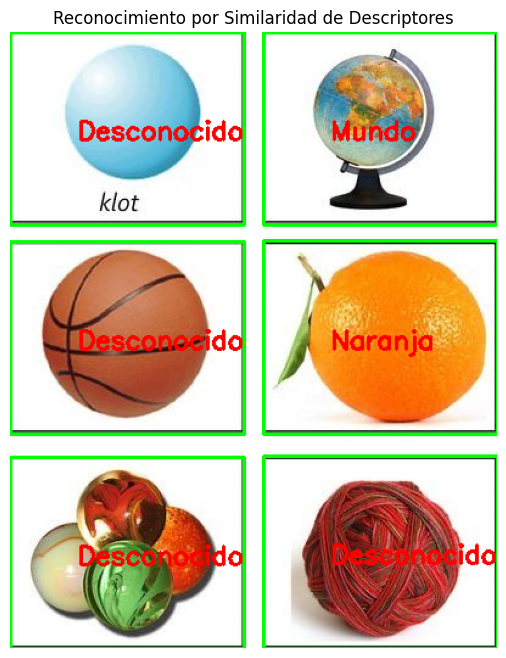

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

referencias = {
    "Naranja": cv2.imread("identificar_objetos/naranja.png", 0),
    "Mundo": cv2.imread("identificar_objetos/Mundo.png", 0)
}

orb = cv2.ORB_create()
ref_descs = {}
for nombre, img in referencias.items():
    kp, des = orb.detectAndCompute(img, None)
    if des is not None:
        ref_descs[nombre] = des

test_img = cv2.imread('objetos.jpg')
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
_, binaria = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
salida = test_img.copy()

for i, c in enumerate(contornos):
    x, y, w, h = cv2.boundingRect(c)
    if w < 30 or h < 30:
        continue

    obj = gray[y:y+h, x:x+w]
    kp2, des2 = orb.detectAndCompute(obj, None)

    nombre_encontrado = "Desconocido"
    mejor_match = 0
    mejor_distancia = 1000

    if des2 is not None:
        for nombre, des1 in ref_descs.items():
            matches = bf.match(des1, des2)
            if len(matches) >= 20:
                dist = np.mean([m.distance for m in matches])
                if len(matches) > mejor_match and dist < 50:
                    mejor_match = len(matches)
                    mejor_distancia = dist
                    nombre_encontrado = nombre

    cv2.rectangle(salida, (x, y), (x+w, y+h), (0, 255, 0), 2)
    M = cv2.moments(c)
    if M["m00"] != 0:
         cx = int(M["m10"]/M["m00"])
         cy = int(M["m01"]/M["m00"])
         cv2.putText(salida, nombre_encontrado, (cx - 40, cy + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(salida, cv2.COLOR_BGR2RGB))
plt.title("Reconocimiento por Similaridad de Descriptores")
plt.axis('off')
plt.show()


Ejercicio 4

Problema identificado:
Necesidad de automatizar la identificación visual de objetos en imágenes (por ejemplo, para inventarios, control de calidad)

OBJETOS DETECTADOS:

Objeto 1: Área = 29796.00, Perímetro = 694.00, Centroide = (95, 78)
Objeto 2: Área = 29796.00, Perímetro = 694.00, Centroide = (303, 78)
Objeto 3: Área = 29787.00, Perímetro = 695.31, Centroide = (95, 250)
Objeto 4: Área = 29787.00, Perímetro = 696.14, Centroide = (303, 250)
Objeto 5: Área = 29796.00, Perímetro = 694.00, Centroide = (95, 427)
Objeto 6: Área = 29796.00, Perímetro = 694.00, Centroide = (303, 427)


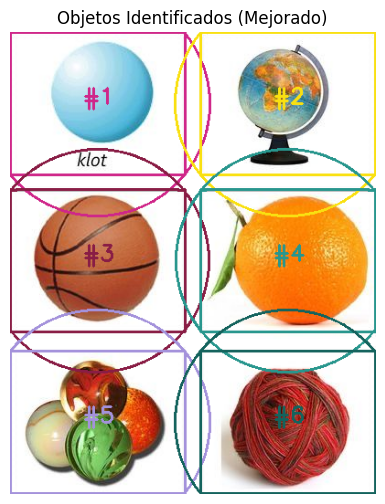

In [142]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('objetos.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binaria = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)
contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

objetos = []

for c in contornos:
    M = cv2.moments(c)
    if M["m00"] == 0:
        continue
    cx = int(M["m10"]/M["m00"])
    cy = int(M["m01"]/M["m00"])
    area = cv2.contourArea(c)
    perim = cv2.arcLength(c, True)
    (xc, yc), r = cv2.minEnclosingCircle(c)
    objetos.append({
        "contorno": c,
        "centro": (cx, cy),
        "area": area,
        "perimetro": perim,
        "circle": ((int(xc), int(yc)), int(r))
    })

objetos.sort(key=lambda x: (x["centro"][1] // 100, x["centro"][0]))

img_salida = img.copy()
print("OBJETOS DETECTADOS:\n")

for i, obj in enumerate(objetos):
    color = tuple(np.random.randint(0, 255, 3).tolist())
    c = obj["contorno"]
    cx, cy = obj["centro"]
    area = obj["area"]
    perim = obj["perimetro"]
    (xci, yci), r = obj["circle"]

    cv2.drawContours(img_salida, [c], -1, color, 2)
    cv2.circle(img_salida, (xci, yci), r, color, 2)
    cv2.putText(img_salida, f"#{i+1}", (cx-15, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    print(f"Objeto {i+1}: Área = {area:.2f}, Perímetro = {perim:.2f}, Centroide = ({cx}, {cy})")

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img_salida, cv2.COLOR_BGR2RGB))
plt.title('Objetos Identificados (Mejorado)')
plt.axis('off')
plt.show()
